# Dimensionality Reduction using UMAP

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment11/Dimensionality_reduction_2.ipynb)


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Let's start by loading the dataset to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/ds_salaries.csv'
ds_salaries_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
ds_salaries_df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Data Preprocessing
First, we'll conduct the necessary preprocessing steps on the 'ds_salaries.csv' dataset. These steps include handling missing values, feature scaling, and encoding categorical variables. We'll also briefly discuss the choice of these techniques and their impact on subsequent UMAP results.

1. Handling Missing Values
Let's check for missing values in the dataset and decide on a strategy to handle them.

In [4]:
# Checking for missing values
missing_values = ds_salaries_df.isnull().sum()
missing_values


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

2. Feature Scaling
Feature scaling is crucial for algorithms that are sensitive to the scale of input data. Since UMAP is a distance-based algorithm, different scales in the data can impact the formation of clusters.

In [5]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = ['salary_in_usd', 'remote_ratio']
scaler = StandardScaler()

# Scaling the numerical columns
ds_salaries_df[numerical_cols] = scaler.fit_transform(ds_salaries_df[numerical_cols])


3. Encoding Categorical Variables
UMAP, like many machine learning algorithms, works with numerical data. Therefore, we need to encode categorical variables.



In [6]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns
categorical_cols = ds_salaries_df.select_dtypes(include=['object']).columns

# One-hot encoding of categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_cats = encoder.fit_transform(ds_salaries_df[categorical_cols])

# Creating a dataframe from the encoded categories
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenating the encoded dataframe with the original one and dropping original categorical columns
ds_salaries_df = pd.concat([ds_salaries_df, encoded_cats_df], axis=1)
ds_salaries_df.drop(categorical_cols, axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1. Missing Values: There are no missing values in the dataset, so no imputation was necessary.
2. Feature Scaling: The numerical columns 'salary_in_usd' and 'remote_ratio' have been scaled using StandardScaler. This step is essential for distance-based algorithms like UMAP, as it ensures that all features contribute equally to the distance calculations.
3. Encoding Categorical Variables: Categorical variables have been one-hot encoded. This is crucial for UMAP and other machine learning algorithms that require numerical input. The original categorical columns have been replaced with their encoded versions.

# UMAP for Clustering
Let's implement UMAP for dimensionality reduction and then use a clustering algorithm (e.g., K-Means) to group the data. The goal is to visualize these clusters in the reduced space.

1. UMAP Dimensionality Reduction
We'll reduce the dimensionality of our preprocessed dataset using UMAP. This step is aimed at capturing the essential structures of the data in a lower-dimensional space, facilitating clustering.

In [7]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1c9589cf5fe905f35dbea1be57747eb0b4f3599ed1f177cab27bc901a713076c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


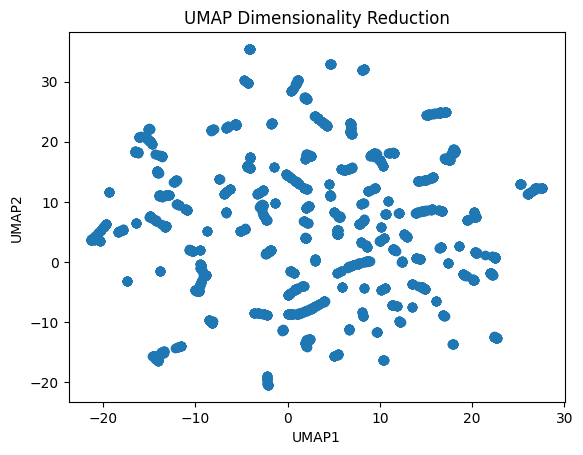

In [8]:
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# UMAP Dimensionality Reduction
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap.fit_transform(ds_salaries_df)

# Visualizing the UMAP output
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


2. Clustering with K-Means
After reducing dimensions, we'll apply K-Means clustering to the UMAP output to identify distinct groups in the data.

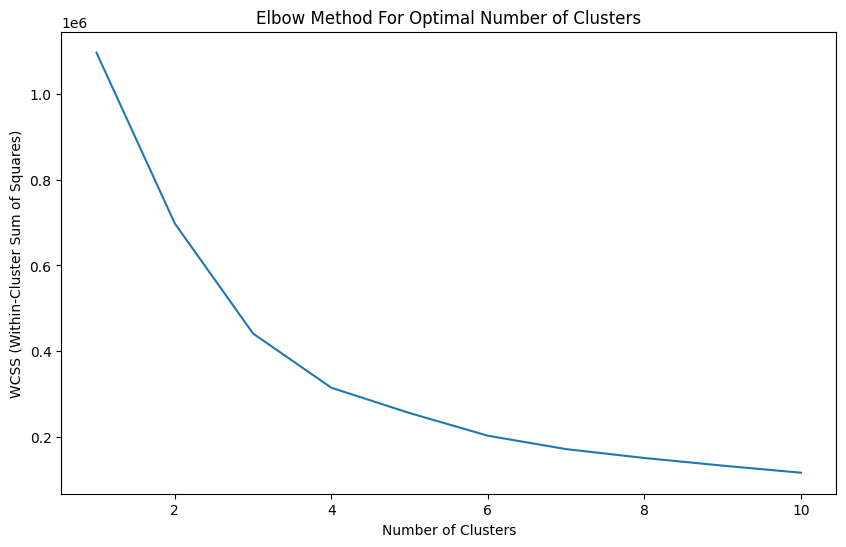

In [9]:
from sklearn.cluster import KMeans
import numpy as np
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
# Determining the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(umap_df)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


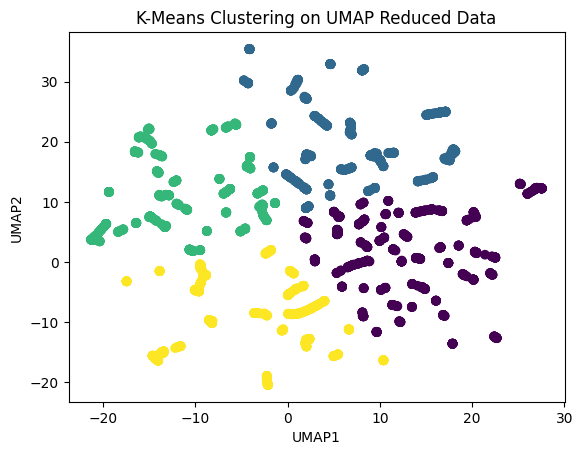

In [10]:
# Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(umap_result)

# Visualizing the clusters
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering on UMAP Reduced Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


# UMAP for Classification
Now, let's use UMAP as a feature extraction tool for classification, targeting the 'salary' column. We will employ a suitable classification algorithm and visualize the results.

1. UMAP for Feature Extraction
We will apply UMAP to extract features which will then be used for classification.

In [11]:
# UMAP for Feature Extraction
umap_features = UMAP(n_neighbors=4, min_dist=0.3, n_components=10, random_state=42)
X_features = umap_features.fit_transform(ds_salaries_df.drop('salary', axis=1))
X_features

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


array([[ 6.9496191e-01,  5.4677820e+00, -3.0663741e-01, ...,
         4.7707372e+00,  4.3195438e+00,  5.1225390e+00],
       [-6.2679062e+00,  4.4465728e+00,  3.4197605e+00, ...,
         4.9109077e+00,  4.0507379e+00,  7.5994806e+00],
       [-6.2746720e+00,  4.4264207e+00,  3.4170640e+00, ...,
         4.8931966e+00,  4.0413971e+00,  7.5673022e+00],
       ...,
       [ 9.6233749e-01,  7.1023746e+00,  3.5762572e-01, ...,
         4.1970091e+00,  3.6095059e+00,  6.2189665e+00],
       [ 1.1467289e+00,  7.3455825e+00, -1.1650276e-03, ...,
         4.5035543e+00,  3.6345739e+00,  5.5780487e+00],
       [ 1.6054009e+00,  7.2802215e+00, -3.1819206e-01, ...,
         3.4253907e+00,  4.8782120e+00,  6.3692579e+00]], dtype=float32)

2. Classification
We'll use a classification algorithm (e.g., Random Forest Classifier) to predict salaries.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preparing the dataset for classification
y = ds_salaries_df['salary']
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

# Classification using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        7000       0.00      0.00      0.00         1
        8000       0.00      0.00      0.00         1
        9272       0.00      0.00      0.00         1
       10000       0.00      0.00      0.00         2
       12000       0.00      0.00      0.00         1
       13400       0.00      0.00      0.00         0
       14000       0.00      0.00      0.00         0
       15000       0.00      0.00      0.00         2
       19000       0.00      0.00      0.00         1
       20000       0.33      0.50      0.40         2
       21000       0.00      0.00      0.00         0
       22000       0.00      0.00      0.00         0
       23000       0.00      0.00      0.00         0
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00         1
       26000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         0
       28500       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.